# Example 2: Dataframes

This Example demonstrates the capabilities of the class Dataframes_SIR3S_Model that extends SIR3S_Model be abilities to work directley with pandas dataframes.  

# Toolkit Release

In [1]:
#pip install 

# Imports

## SIR 3S Toolkit

### Regular Import/Init

In [2]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-19_x64" #change to local path

In [3]:
from sir3stoolkit.core import wrapper

In [4]:
wrapper

<module 'sir3stoolkit.core.wrapper' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\core\\wrapper.py'>

In [5]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional Import/Init for Dataframes class

from sir3stoolkit.mantle import dataframe

We can just import the whole mantle to get all higher level modeling functions.

In [6]:
from sir3stoolkit.mantle import mantle

In [7]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


In [8]:
from sir3stoolkit.mantle import mantle

In [9]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


## Additional

In [ ]:
import pandas as pd
from shapely.geometry import Point
import re
import folium
from folium.plugins import HeatMap
import numpy as np
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as cx

# Open Model

In [11]:
s3s.OpenModel(dbName=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example3.db3",
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Prepare Data

## District Heating Consumer

### Metadata

In [12]:
df_consumer_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.DistrictHeatingConsumer, properties=[], geometry=True)

[2025-10-17 13:22:33,659] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-10-17 13:22:33,667] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 337 element(s) of element type ObjectTypes.DistrictHeatingConsumer.
[2025-10-17 13:22:33,691] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 0 metadata properties.
[2025-10-17 13:22:33,692] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving geometry...
[2025-10-17 13:22:33,724] INFO in sir3stoolkit.mantle.dataframes: [metadata] 0 non-empty end node columns were created)
[2025-10-17 13:22:33,726] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (337, 2)


In [13]:
df_consumer_metadata.head(3)

tk                                   geometry
0  4743997951091160959   POINT (713181.847468032 5578489.9250612)
1  5014209100699808035  POINT (713369.326806115 5578395.12330167)
2  4627580049017248376  POINT (713251.536184149 5578455.25247764)

### Result Data

In [14]:
df_consumer_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.DistrictHeatingConsumer, ["W"])

[2025-10-17 13:22:33,759] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.DistrictHeatingConsumer
[2025-10-17 13:22:33,760] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-10-17 13:22:33,868] INFO in sir3stoolkit.mantle.dataframes: 25 simulation timestamps will be used.
[2025-10-17 13:22:33,938] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamps will be used.
[2025-10-17 13:22:33,938] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 337 tks.
[2025-10-17 13:22:33,942] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2025-10-17 13:22:33,943] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-10-17 13:22:34,704] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (8425, 3)


In [15]:
df_consumer_results.head(3)

timestamp                   tk  W
0  2023-02-13 00:00:00.000 +01:00  4743997951091160959  0
1  2023-02-13 00:00:00.000 +01:00  5014209100699808035  0
2  2023-02-13 00:00:00.000 +01:00  4627580049017248376  0

### Merge

In [16]:
df_consumer = pd.merge(
    df_consumer_metadata,
    df_consumer_results,
    on="tk",
    how="outer"
)

In [17]:
df_consumer.head(3)

tk                                 geometry  \
0  4611752310942477664  POINT (713675.30023234 5578705.1927566)   
1  4611752310942477664  POINT (713675.30023234 5578705.1927566)   
2  4611752310942477664  POINT (713675.30023234 5578705.1927566)   

                        timestamp         W  
0  2023-02-13 00:00:00.000 +01:00   39.3675  
1  2023-02-13 01:00:00.000 +01:00  39.83363  
2  2023-02-13 02:00:00.000 +01:00  40.48209

## Pipes

### Metadata

In [18]:
df_pipes_metadata=s3s.generate_element_metadata_dataframe(element_type=s3s.ObjectTypes.Pipe, properties=["DN", "Kvr"], geometry=True, end_nodes=True)

[2025-10-17 13:22:34,775] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Pipe
[2025-10-17 13:22:34,784] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 524 element(s) of element type ObjectTypes.Pipe.
[2025-10-17 13:22:34,786] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 2 metadata properties.
[2025-10-17 13:22:34,787] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['DN', 'Kvr'], geometry, end nodes...
[2025-10-17 13:22:34,979] INFO in sir3stoolkit.mantle.dataframes: [metadata] 2 non-empty end node columns were created)
[2025-10-17 13:22:34,979] INFO in sir3stoolkit.mantle.dataframes: [metadata] Done. Shape: (524, 6)


In [19]:
df_pipes_metadata.head(3)

tk   DN Kvr  \
0  5442010239090746007  150   1   
1  4917786378639043296  125   1   
2  4762482310382009633  125   1   

                                            geometry                 fkKI  \
0  LINESTRING (713620.267807079 5578828.41875394,...  5669301360686511351   
1  LINESTRING (713602.294599536 5578860.10567987,...  5397948523091900401   
2  LINESTRING (713574.061626605 5578909.87290685,...  5239335112004772156   

                  fkKK  
0  5397948523091900401  
1  5239335112004772156  
2  5298886695042021307

### Result data

In [20]:
df_pipes_results=s3s.generate_element_results_dataframe(s3s.ObjectTypes.Pipe, ["QMAV"])

[2025-10-17 13:22:35,016] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Pipe
[2025-10-17 13:22:35,018] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()).
[2025-10-17 13:22:35,189] INFO in sir3stoolkit.mantle.dataframes: 25 simulation timestamps will be used.
[2025-10-17 13:22:35,287] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 25 valid timestamps will be used.
[2025-10-17 13:22:35,315] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieved 524 tks.
[2025-10-17 13:22:35,319] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2025-10-17 13:22:35,319] INFO in sir3stoolkit.mantle.dataframes: [results] Retrieving result properties...
[2025-10-17 13:22:37,094] INFO in sir3stoolkit.mantle.dataframes: [results] Done. Shape: (13100, 3)


In [21]:
df_pipes_results.head(3)

timestamp                   tk      QMAV
0  2023-02-13 00:00:00.000 +01:00  5442010239090746007  52.84819
1  2023-02-13 00:00:00.000 +01:00  4917786378639043296  29.67386
2  2023-02-13 00:00:00.000 +01:00  4762482310382009633   30.2523

In [22]:
df_pipes_results["QMAV"]=df_pipes_results["QMAV"].astype(float)

In [23]:
df_pipes_results["QMAV"]=df_pipes_results["QMAV"].abs()

In [24]:
df_pipes_results=df_pipes_results.rename(columns={"QMAV": "QMAVAbs"})

### Merge

In [25]:
df_pipes = pd.merge(
    df_pipes_metadata,
    df_pipes_results,
    on="tk",
    how="outer"
)

In [26]:
df_pipes=df_pipes[df_pipes["Kvr"] == "1"]

In [27]:
df_pipes.head(3)

tk   DN Kvr  \
25  4615723899944629797  999   1   
26  4615723899944629797  999   1   
27  4615723899944629797  999   1   

                                             geometry                 fkKI  \
25  LINESTRING (713738.296567236 5579219.90221333,...  5129584372458662150   
26  LINESTRING (713738.296567236 5579219.90221333,...  5129584372458662150   
27  LINESTRING (713738.296567236 5579219.90221333,...  5129584372458662150   

                   fkKK                       timestamp       QMAVAbs  
25  5332825919690090061  2023-02-13 00:00:00.000 +01:00  3.667083e-10  
26  5332825919690090061  2023-02-13 01:00:00.000 +01:00  1.440640e-09  
27  5332825919690090061  2023-02-13 02:00:00.000 +01:00  1.414446e-09

### Plotting Constants

In [28]:
def parse_point_string(s):
    # Extract numbers from the string using regex
    match = re.match(r'POINT\s*\(\s*([-\d\.]+)\s+([-\d\.]+)\s*\)', s)
    if match:
        x, y = float(match.group(1)), float(match.group(2))
        return Point(x, y)
    else:
        return None

In [29]:
df_consumer['geometry'] = df_consumer['geometry'].apply(parse_point_string)

x_mean = df_consumer['geometry'].apply(lambda p: p.x if p else None).mean()
y_mean = df_consumer['geometry'].apply(lambda p: p.y if p else None).mean()

### Change datatypes

In [30]:

df_pipes['DN'] = pd.to_numeric(df_pipes['DN'], errors='coerce')
df_pipes['QMAVAbs'] = pd.to_numeric(df_pipes['QMAVAbs'], errors='coerce')


### Filter rows

In [31]:
df_pipes = df_pipes[df_pipes['DN'] != 999]

### Turn into gdf

In [32]:
df_pipes['geometry'] = df_pipes['geometry'].apply(wkt.loads)

In [33]:
gdf_pipes = gpd.GeoDataFrame(df_pipes, geometry='geometry')

In [34]:
gdf_pipes=gdf_pipes.set_crs(epsg=4326, inplace=True)

In [35]:
gdf_pipes.head(3)

tk   DN Kvr  \
75  4621904482639719098  200   1   
76  4621904482639719098  200   1   
77  4621904482639719098  200   1   

                                             geometry                 fkKI  \
75  LINESTRING (713283.93228 5578718.12301, 713299...  5106194195554624313   
76  LINESTRING (713283.93228 5578718.12301, 713299...  5106194195554624313   
77  LINESTRING (713283.93228 5578718.12301, 713299...  5106194195554624313   

                   fkKK                       timestamp   QMAVAbs  
75  5416743601805578486  2023-02-13 00:00:00.000 +01:00  86.89403  
76  5416743601805578486  2023-02-13 01:00:00.000 +01:00  87.91040  
77  5416743601805578486  2023-02-13 02:00:00.000 +01:00  89.32416

# Plotting (WORK IN PROGRESS)

The function used below is not yet released.

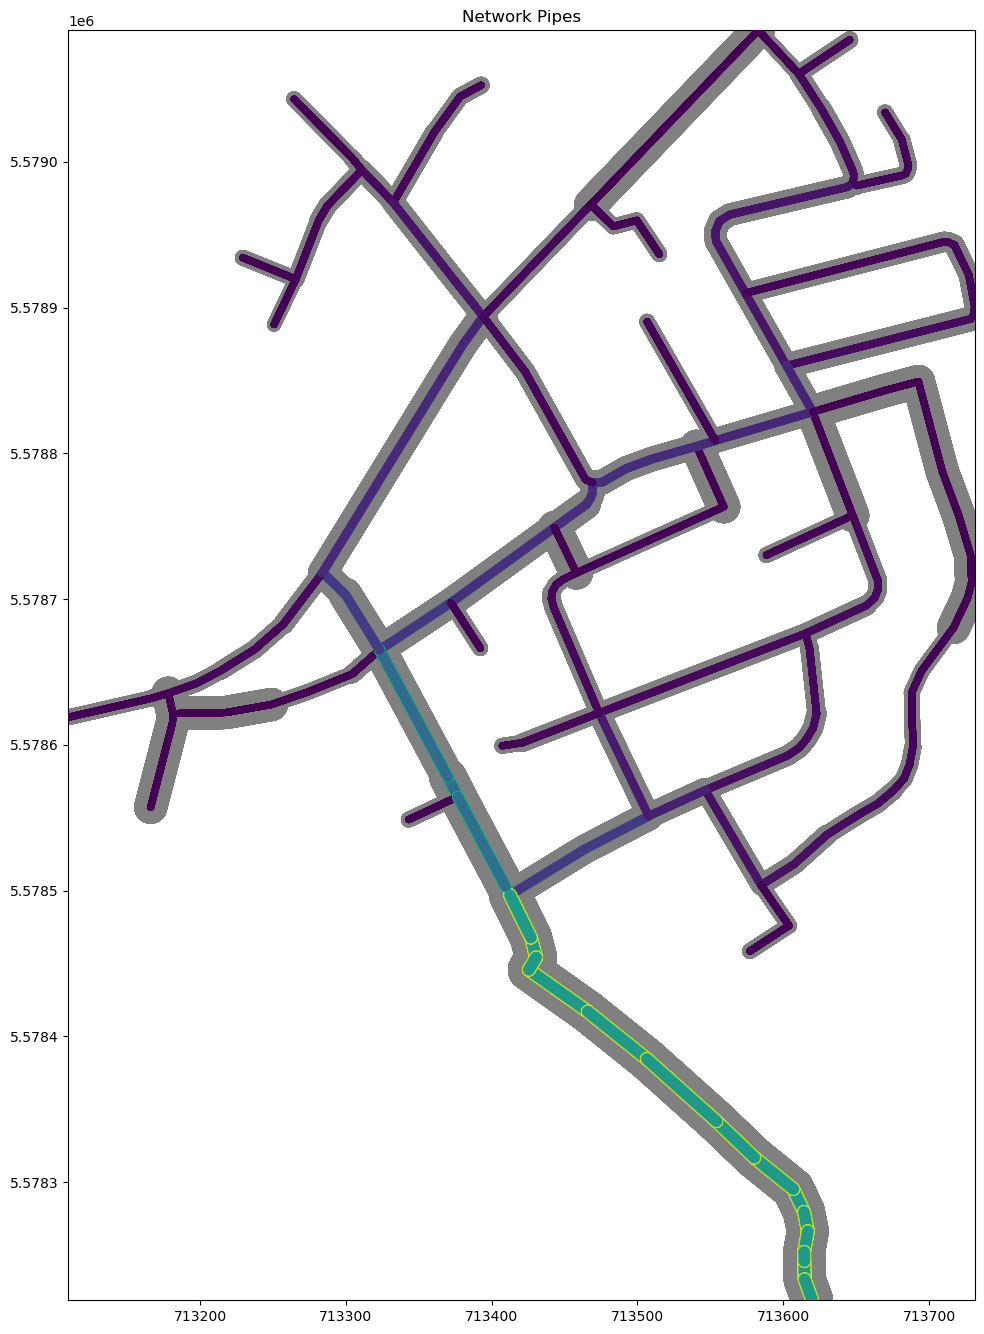

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=s3s.din_figsize("A3", orientation="portrait"))


# 1) Create the first layer (no color mixing)
layer1 = s3s.create_pipe_layer(
    gdf=gdf_pipes,
    geometry_col="geometry",
    cmap="viridis",
    width_scaling_col="DN",
    #color_mixing_col="QMAVAbs",
    min_width = 10,
    max_width = 30,
    default_color = (0.5, 0.5, 0.5, 1)
)

ax = layer1["axes"]  # grab axes from the first layer

layer2 = s3s.create_pipe_layer(
    gdf=gdf_pipes,
    ax=ax,
    geometry_col="geometry",
    cmap="viridis",
    width_scaling_col="QMAVAbs",
    color_mixing_col="QMAVAbs",
    min_width = 5,
    max_width = 10,
)

layer1["artist"].set_zorder(1)  
layer2["artist"].set_zorder(10)  

ax.set_title("Network Pipes")
plt.show()